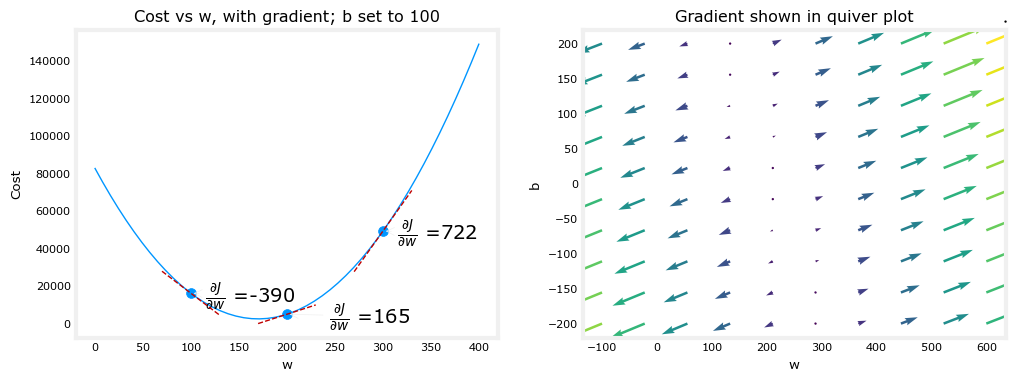

Iteration    0: Cost 1.23e+05  dj_dw: -1.170e+03, dj_db: -4.700e+02   w:  1.170e+00, b: 4.70000e-01
Iteration 1000: Cost 1.96e+03  dj_dw: -4.124e+00, dj_db:  5.067e+00   w:  1.825e+02, b: 6.74019e+01
Iteration 2000: Cost 1.92e+03  dj_dw: -2.163e+00, dj_db:  5.293e+00   w:  1.851e+02, b: 6.19753e+01
Iteration 3000: Cost 1.89e+03  dj_dw: -1.976e+00, dj_db:  4.844e+00   w:  1.871e+02, b: 5.69097e+01
Iteration 4000: Cost 1.86e+03  dj_dw: -1.808e+00, dj_db:  4.432e+00   w:  1.890e+02, b: 5.22749e+01
Iteration 5000: Cost 1.84e+03  dj_dw: -1.654e+00, dj_db:  4.055e+00   w:  1.908e+02, b: 4.80343e+01
Iteration 6000: Cost 1.83e+03  dj_dw: -1.514e+00, dj_db:  3.710e+00   w:  1.923e+02, b: 4.41544e+01
Iteration 7000: Cost 1.81e+03  dj_dw: -1.385e+00, dj_db:  3.395e+00   w:  1.938e+02, b: 4.06046e+01
Iteration 8000: Cost 1.80e+03  dj_dw: -1.267e+00, dj_db:  3.106e+00   w:  1.951e+02, b: 3.73567e+01
Iteration 9000: Cost 1.79e+03  dj_dw: -1.159e+00, dj_db:  2.842e+00   w:  1.963e+02, b: 3.43851e+01


interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

In [3]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients,plt_intuition

x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

#x_train = np.array([1.0,2.0])
#y_train = np.array([300, 500])

def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost
    return total_cost

def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in)
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w , b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        if i<100000:
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b, J_history, p_history

w_init = 0
b_init = 0
iterations =10000
tmp_alpha = 1.0e-3
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

plt_intuition(x_train,y_train)